In [37]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import osmnx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [3]:
melb_stops = gpd.read_file('first_outputs/melbourne_processed.shp')
melb_stops

,stop_id,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry
0,1000,Dole Ave/Cheddar Rd (Reservoir),-37.700775,145.018951,1699463656,45.873188,14195.158,Reservoir,POINT (145.01895 -37.70077)
1,10001,Rex St/Taylors Rd (Kings Park),-37.726975,144.776152,6672777022,59.953752,21284.349,Kings Park,POINT (144.77615 -37.72698)
2,10002,Yuille St/Centenary Ave (Melton),-37.676160,144.595789,2110280895,30.857211,39800.249,Melton,POINT (144.59579 -37.67616)
3,10009,Gum Rd/Main Rd West (Albanvale),-37.741497,144.775899,356254241,46.595341,20023.079,Albanvale,POINT (144.77590 -37.74150)
4,1001,Lloyd Ave/Cheddar Rd (Reservoir),-37.699183,145.019685,2662544578,43.638527,14296.058,Reservoir,POINT (145.01969 -37.69918)
...,...,...,...,...,...,...,...,...,...
18399,9991,Donald St/Wood St (Preston),-37.735366,145.022375,313099534,18.584730,11501.338,Preston,POINT (145.02238 -37.73537)
18400,9992,Highview Rd/Wood St (Preston),-37.735117,145.019886,313099499,23.928361,11322.284,Preston,POINT (145.01989 -37.73512)
18401,9993,Plenty Rd/Wood St (Preston),-37.734460,145.014014,310943867,30.141446,10747.427,Preston,POINT (145.01401 -37.73446)
18402,9994,Yellow Gum Rd/Copperfield Dr (Delahey),-37.713855,144.771894,267224397,20.932852,22845.553,Delahey,POINT (144.77189 -37.71385)


In [7]:
mean_dist_btwn_stops = pd.read_csv('distance_between_stops.csv', index_col='stop_id')

In [8]:
melb_stops.set_index('stop_id', inplace=True)
melb_stops['mean_distance'] = mean_dist_btwn_stops
melb_stops

,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry,mean_distance
stop_id,,,,,,,,,
1000,Dole Ave/Cheddar Rd (Reservoir),-37.700775,145.018951,1699463656,45.873188,14195.158,Reservoir,POINT (145.01895 -37.70077),192.77
10001,Rex St/Taylors Rd (Kings Park),-37.726975,144.776152,6672777022,59.953752,21284.349,Kings Park,POINT (144.77615 -37.72698),192.81
10002,Yuille St/Centenary Ave (Melton),-37.676160,144.595789,2110280895,30.857211,39800.249,Melton,POINT (144.59579 -37.67616),623.42
10009,Gum Rd/Main Rd West (Albanvale),-37.741497,144.775899,356254241,46.595341,20023.079,Albanvale,POINT (144.77590 -37.74150),371.64
1001,Lloyd Ave/Cheddar Rd (Reservoir),-37.699183,145.019685,2662544578,43.638527,14296.058,Reservoir,POINT (145.01969 -37.69918),225.04
...,...,...,...,...,...,...,...,...,...
9991,Donald St/Wood St (Preston),-37.735366,145.022375,313099534,18.584730,11501.338,Preston,POINT (145.02238 -37.73537),220.92
9992,Highview Rd/Wood St (Preston),-37.735117,145.019886,313099499,23.928361,11322.284,Preston,POINT (145.01989 -37.73512),521.40
9993,Plenty Rd/Wood St (Preston),-37.734460,145.014014,310943867,30.141446,10747.427,Preston,POINT (145.01401 -37.73446),528.38


## Distance between stops

In [13]:
# Null stops have no departures, only arrivals
melb_stops[melb_stops.mean_distance.isnull()]

,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry,mean_distance
stop_id,,,,,,,,,
12746,Civic Reserve/Dunns Rd (Mornington),-38.235371,145.050091,1717787887,14.928324,54386.693,Mornington,POINT (145.05009 -38.23537),NaN
13991,Lockwood Rd/Mt Morton Rd (Belgrave South),-37.933158,145.349692,704893836,49.750106,39572.072,Belgrave South,POINT (145.34969 -37.93316),NaN
15998,Collins St/Swanston St (Mentone),-37.980479,145.065817,5583923998,6.430638,21238.399,Mentone,POINT (145.06582 -37.98048),NaN
16577,Redwood Dr/Garden Bvd (Dingley Village),-37.983063,145.113888,31318867,121.705661,25497.662,Dingley Village,POINT (145.11389 -37.98306),NaN
17217,Wantirna Primary School/Mountain Hwy (Wantirna),-37.856164,145.216002,583451043,27.880965,24151.146,Wantirna,POINT (145.21600 -37.85616),NaN
17512,Merinda Park Station/Endeavour Dr (Cranbourne ...,-38.079428,145.264356,885983661,43.482480,43587.032,Cranbourne North,POINT (145.26436 -38.07943),NaN
18854,Gowrie Station/Sages Rd (Glenroy),-37.699941,144.958464,4791435154,17.167447,12930.105,Glenroy,POINT (144.95846 -37.69994),NaN
21217,Frankston Railway Station/Young St (Frankston),-38.144855,145.124426,604275588,7.786069,41201.163,Frankston,POINT (145.12443 -38.14485),NaN
23388,Oakleigh Station/Haughton Rd (Oakleigh),-37.900623,145.088188,677444436,15.620828,16515.059,Oakleigh,POINT (145.08819 -37.90062),NaN


Text(0, 0.5, 'Mean distance to neighbouring stops')

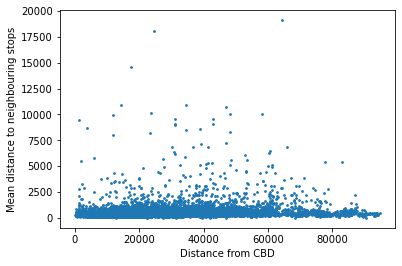

In [32]:
plt.scatter(melb_stops.cbd_dist, melb_stops.mean_distance, s=3)
plt.xlabel('Distance from CBD')
plt.ylabel('Mean distance to neighbouring stops')

r squared 0.055292119241525106


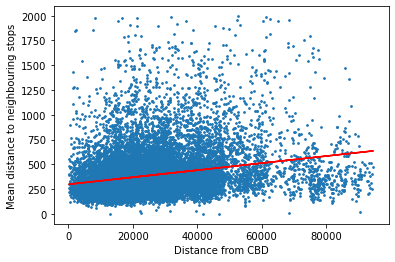

In [38]:
from sklearn.linear_model import LinearRegression

melb_stops_clean = melb_stops[melb_stops.mean_distance<2000]

x = np.array(melb_stops_clean.cbd_dist).reshape((-1, 1))
y = np.array(melb_stops_clean.mean_distance)
m = LinearRegression().fit(x, y)
print("r squared", m.score(x, y))
                
plt.scatter(melb_stops_clean.cbd_dist, melb_stops_clean.mean_distance, s=3)
plt.xlabel('Distance from CBD')
plt.ylabel('Mean distance to neighbouring stops')
plt.plot(x, m.predict(x), color='red')

In [35]:
from scipy.stats import pearsonr
r, p = pearsonr(melb_stops_clean.cbd_dist, melb_stops_clean.mean_distance)
r, p

(0.23514276353212574, 8.993451265080349e-227)

In [31]:
melb_stops[melb_stops.mean_distance>10000]

,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry,mean_distance
stop_id,,,,,,,,,
13957,Emerald Village/Main St (Emerald),-37.932110,145.441333,369630982,8.337747,46919.344,Emerald,POINT (145.44133 -37.93211),10704.855
21296,Chirnside Park SC/Maroondah Hwy (Chirnside Park),-37.757886,145.312627,4153265778,14.027191,34566.644,Chirnside Park,POINT (145.31263 -37.75789),10935.340
22108,Doncaster Rd/Eastern Fwy On Ramp (Balwyn North),-37.788341,145.101941,599280219,22.639115,14430.693,Balwyn North,POINT (145.10194 -37.78834),10876.745
22458,Keilor Golf Course/Calder Fwy (Keilor North),-37.684764,144.789037,603452595,22.017120,23758.485,Keilor North,POINT (144.78904 -37.68476),10176.620
4372,Middleborough Rd/Eastern Fwy On-ramp (Blackbur...,-37.798782,145.141834,3747668876,50.870012,17397.772,Blackburn North,POINT (145.14183 -37.79878),14556.600
48816,Dowd Rd/Maroondah Hwy (Healesville),-37.648880,145.560623,2826255441,112.902075,64423.637,Healesville,POINT (145.56062 -37.64888),19106.390
7877,Eastland SC/Warrandyte Rd (Ringwood),-37.812460,145.230652,6206939288,27.632233,24657.949,Ringwood,POINT (145.23065 -37.81246),18083.385
7887,St Huberts Rd/Maroondah Hwy (Coldstream),-37.697522,145.420602,1721486879,25.523814,48088.341,Coldstream,POINT (145.42060 -37.69752),10052.930
8646,Airlie Rd/Maroondah Hwy (Healesville),-37.670073,145.511584,1403098535,33.363483,58170.931,Healesville,POINT (145.51158 -37.67007),10043.170


## Intersection distance

Text(0, 0.5, 'Distance to nearest intersection')

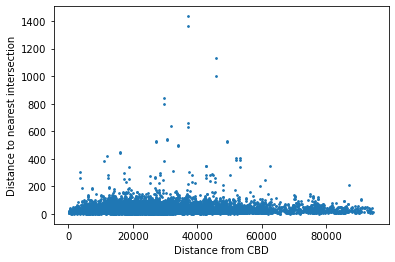

In [41]:
plt.scatter(melb_stops.cbd_dist, melb_stops.node_dist, s=3)
plt.xlabel('Distance from CBD')
plt.ylabel('Distance to nearest intersection')

r squared 0.006836955643244158


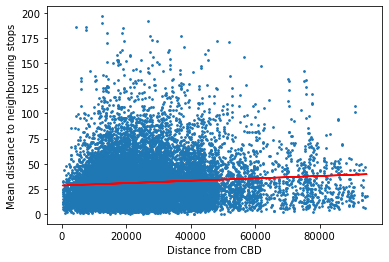

In [45]:
melb_stops_clean = melb_stops[melb_stops.node_dist<200]

x = np.array(melb_stops_clean.cbd_dist).reshape((-1, 1))
y = np.array(melb_stops_clean.node_dist)
m = LinearRegression().fit(x, y)
print("r squared", m.score(x, y))
                
plt.scatter(melb_stops_clean.cbd_dist, melb_stops_clean.node_dist, s=3)
plt.xlabel('Distance from CBD')
plt.ylabel('Mean distance to neighbouring stops')
plt.plot(x, m.predict(x), color='red')

In [44]:
melb_stops[melb_stops.node_dist>600]

,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry,mean_distance
stop_id,,,,,,,,,
21036,355 Kangaroo Ground-Warrandyte Rd (Kangaroo Gr...,-37.701578,145.226112,278639609,639.537286,31792.548,Kangaroo Ground,POINT (145.22611 -37.70158),569.23
23484,655 Yea Rd (Humevale),-37.486592,145.183153,6559775036,1133.364307,45958.843,Humevale,POINT (145.18315 -37.48659),2212.12
23485,640 Yea Rd (Humevale),-37.487729,145.182650,6559775036,1001.783069,45958.843,Humevale,POINT (145.18265 -37.48773),2852.15
7689,2115 Plenty Rd (Yan Yean),-37.543077,145.109922,6215550691,1364.729359,37239.422,Yan Yean,POINT (145.10992 -37.54308),706.20
7690,2195 Plenty Rd (Yan Yean),-37.536796,145.111110,6215550691,659.432302,37239.422,Yan Yean,POINT (145.11111 -37.53680),795.32
7734,2110 Plenty Rd (Yan Yean),-37.543717,145.109951,6215550691,1435.217503,37239.422,Yan Yean,POINT (145.10995 -37.54372),997.43
7735,2190 Plenty Rd (Yan Yean),-37.536576,145.111399,6215550691,633.453497,37239.422,Yan Yean,POINT (145.11140 -37.53658),805.37
7814,395 Kangaroo Ground-Warrandyte Rd (Kangaroo Gr...,-37.698317,145.224386,278640529,842.185410,29766.189,Kangaroo Ground,POINT (145.22439 -37.69832),836.93
8533,360 Kangaroo Ground-Warrandyte Rd (Kangaroo Gr...,-37.697888,145.224067,278640529,798.510045,29766.189,Kangaroo Ground,POINT (145.22407 -37.69789),829.74


## Node Distance Histogram

(array([1.5295e+04, 2.7000e+03, 2.9000e+02, 5.2000e+01, 1.2000e+01,
        1.9000e+01, 5.0000e+00, 5.0000e+00, 7.0000e+00, 2.0000e+00,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.91695449e-01, 4.80258890e+01, 9.58600826e+01, 1.43694276e+02,
        1.91528470e+02, 2.39362663e+02, 2.87196857e+02, 3.35031050e+02,
        3.82865244e+02, 4.30699438e+02, 4.78533631e+02, 5.26367825e+02,
        5.74202018e+02, 6.22036212e+02, 6.69870405e+02, 7.17704599e+02,
        7.65538793e+02, 8.13372986e+02, 8.61207180e+02, 9.09041373e+02,
        9.56875567e+02, 1.00470976e+03, 1.05254395e+03, 1.10037815e+03,
        1.14821234e+03, 1.19604653e+03, 1.24388073e+03, 1.29171492e+03,
        1.33954912e+03, 1.38738331e+03, 1.43521750e+03]),
 <BarContainer object of 30 

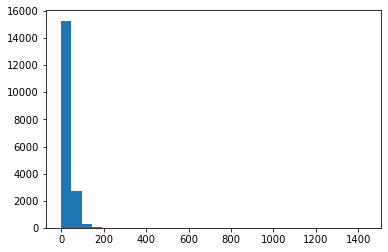

In [47]:
plt.hist(melb_stops.node_dist, bins=30)

(array([ 700., 2183., 2301., 2499., 2344., 2074., 1621., 1236.,  904.,
         605.,  440.,  301.,  263.,  183.,  154.,  115.,  108.,   60.,
          50.,   34.,   29.,   34.,   18.,   19.,   11.,   11.,   11.,
           9.,    4.,    6.]),
 array([  0.19169545,   5.94937114,  11.70704682,  17.46472251,
         23.2223982 ,  28.98007389,  34.73774958,  40.49542526,
         46.25310095,  52.01077664,  57.76845233,  63.52612801,
         69.2838037 ,  75.04147939,  80.79915508,  86.55683076,
         92.31450645,  98.07218214, 103.82985783, 109.58753352,
        115.3452092 , 121.10288489, 126.86056058, 132.61823627,
        138.37591195, 144.13358764, 149.89126333, 155.64893902,
        161.40661471, 167.16429039, 172.92196608]),
 <BarContainer object of 30 artists>)

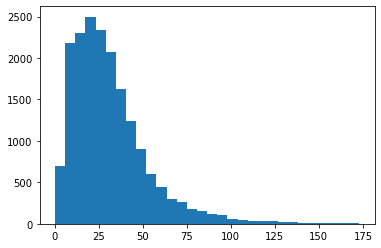

In [50]:
plt.hist(melb_stops[melb_stops.node_dist < 175].node_dist, bins=30)

Text(0, 0.5, 'Number of stops')

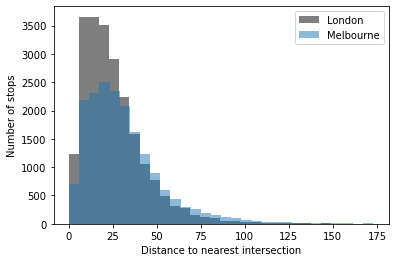

In [62]:
london_stops_ = gpd.read_file('first_outputs/london_processed.shp')
plt.hist(london_stops_[london_stops_.node_dist < 175].node_dist, bins=30, color='k', alpha=0.5)
plt.hist(melb_stops[melb_stops.node_dist < 175].node_dist, bins=30, alpha=0.5)
plt.legend(['London', 'Melbourne'])
plt.xlabel('Distance to nearest intersection')
plt.ylabel('Number of stops')

In [61]:
from statistics import mean, median, stdev
print('mean: M L', mean(melb_stops[melb_stops.node_dist < 175].node_dist), mean(london_stops_[london_stops_.node_dist < 175].node_dist))
print('median: M L', median(melb_stops[melb_stops.node_dist < 175].node_dist), median(london_stops_[london_stops_.node_dist < 175].node_dist))
print('std M L', stdev(melb_stops[melb_stops.node_dist < 175].node_dist), stdev(london_stops_[london_stops_.node_dist < 175].node_dist))

mean: M L 31.341283002850105 25.548157101145605
median: M L 26.817439395392253 21.570412759707672
std M L 21.900449760852418 18.163946694107896


In [71]:
melb_diversity = pd.read_csv('melb_diversity.csv', usecols=['stop_id', 'amenity', 'shops', 'healthcare', 'leisure'])
melb_diversity.set_index('stop_id', inplace=True)
melb_diversity['total'] = melb_diversity.sum(axis=1)
melb_diversity

,amenity,shops,healthcare,leisure,total
stop_id,,,,,
1000,2,0,0,0,2
10001,0,0,0,0,0
10002,0,0,0,0,0
10009,0,0,0,0,0
1001,0,0,0,0,0
...,...,...,...,...,...
9991,0,0,0,0,0
9992,1,0,0,0,1
9993,0,0,0,0,0


In [72]:
melb_stops['diversity'] = melb_diversity['total']
melb_stops

,stop_name,stop_lat,stop_lon,nearest,node_dist,cbd_dist,suburb,geometry,mean_distance,diversity
stop_id,,,,,,,,,,
1000,Dole Ave/Cheddar Rd (Reservoir),-37.700775,145.018951,1699463656,45.873188,14195.158,Reservoir,POINT (145.01895 -37.70077),192.77,2
10001,Rex St/Taylors Rd (Kings Park),-37.726975,144.776152,6672777022,59.953752,21284.349,Kings Park,POINT (144.77615 -37.72698),192.81,0
10002,Yuille St/Centenary Ave (Melton),-37.676160,144.595789,2110280895,30.857211,39800.249,Melton,POINT (144.59579 -37.67616),623.42,0
10009,Gum Rd/Main Rd West (Albanvale),-37.741497,144.775899,356254241,46.595341,20023.079,Albanvale,POINT (144.77590 -37.74150),371.64,0
1001,Lloyd Ave/Cheddar Rd (Reservoir),-37.699183,145.019685,2662544578,43.638527,14296.058,Reservoir,POINT (145.01969 -37.69918),225.04,0
...,...,...,...,...,...,...,...,...,...,...
9991,Donald St/Wood St (Preston),-37.735366,145.022375,313099534,18.584730,11501.338,Preston,POINT (145.02238 -37.73537),220.92,0
9992,Highview Rd/Wood St (Preston),-37.735117,145.019886,313099499,23.928361,11322.284,Preston,POINT (145.01989 -37.73512),521.40,1
9993,Plenty Rd/Wood St (Preston),-37.734460,145.014014,310943867,30.141446,10747.427,Preston,POINT (145.01401 -37.73446),528.38,0


Text(0, 0.5, 'Number of points of interest within 20 metres')

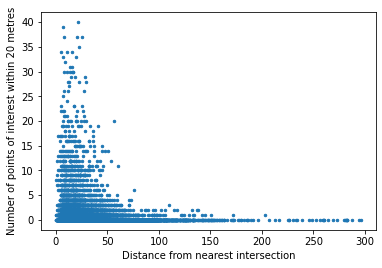

In [81]:
melb_stops_cleaned = melb_stops[melb_stops.node_dist<300]
plt.scatter(melb_stops_cleaned.node_dist, melb_stops_cleaned.diversity, s=6)
plt.xlabel('Distance from nearest intersection')
plt.ylabel('Number of points of interest within 20 metres')